# Persiapan Dataset

Menghubungkan ke google drive, kemudian melakukan pembacaaan dataset

In [1]:
#Menghubungkan Google Colab dengan Google Drive : 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Basic Computation
import pandas as pd
import os

Melihat Sebaran Dataset

In [3]:
def load_images_from_folder(folder,only_path = False, label = ""):
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path


In [4]:
images = []
dirp = "/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits/input_folder/"
for f in os.listdir(dirp):
    images += load_images_from_folder(dirp+f,True,label = f)
   
# membuat data frame
df = pd.DataFrame(images, columns = ["fruit", "path"])
df.head()

,fruit,path
0,Plum,/content/drive/MyDrive/Colab Notebooks/ML_Proj...
1,Plum,/content/drive/MyDrive/Colab Notebooks/ML_Proj...
2,Plum,/content/drive/MyDrive/Colab Notebooks/ML_Proj...
3,Plum,/content/drive/MyDrive/Colab Notebooks/ML_Proj...
4,Plum,/content/drive/MyDrive/Colab Notebooks/ML_Proj...


In [5]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

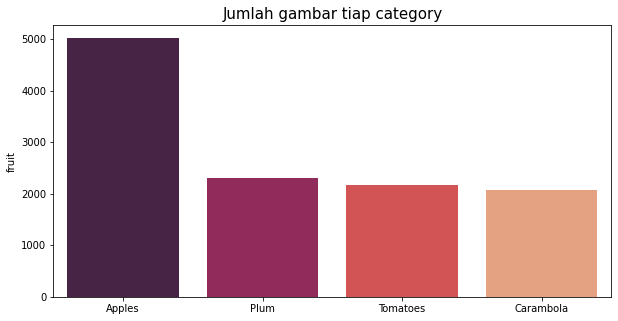

In [6]:
# menampilkan jumlah gambar pada tiap category
vc = df["fruit"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Jumlah gambar tiap category", fontsize = 15)
plt.show()

In [ ]:
# install library untuk pembagian dataset menjadi 3 yaitu train,test,val
!pip install split_folders

## Bagi data menjadi 3 
*   train = 80%
*   test = 10%
*   validasi = 10%

In [ ]:
import splitfolders

In [ ]:
# pembagian dataset menjadi 3 yaitu train,test,val
input_folders = '/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits/input_folder'
output_folders = '/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data'
splitfolders.ratio(input_folders,output_folders, seed =42, ratio=(.8,.1,.1))

Copying files: 11573 files [08:45, 22.02 files/s]


Sampai sini dataset sudah siap untuk digunakan

# Melakukan import untuk kebutuhan klasifikasi dan preprocessing dataset


In [24]:
#Import Library untuk preprocessing dataset: 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2 

# Import Library untuk pembuatan arsitektur model
from keras.optimizers import adam_v2
from keras import models
from keras import layers
import tensorflow as tf
# end import klasifikasi

# import libray untuk read data image
import re, glob,numpy as np 

Menyimpan path / folder train, validation, testing


In [7]:
#Path data train dan data validation 
val_path ='/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data/val'
training_path ='/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data/train'

# path data testing
testing_path ='/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data/test'


Melihat salah satu contoh data, setelah dibagi menjadi 3 folder yaitu train, validation, test

(322, 480, 3)

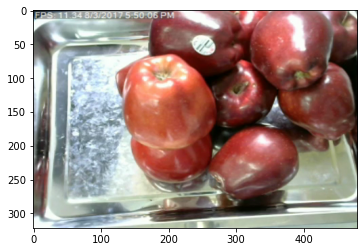

In [10]:
#melihat salah satu gambar dari data validation
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data/val/Apples/Apple 02.png')
plt.imshow(img)

#melihat ukuran pixel dari salah satu gambar :
cv2.imread('/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data/val/Apples/Apple 02.png').shape

# Membuat Dataset generator
untuk melakukan ekstraksi data yang berupa images/citra digital, yang berasal dari sebuah folder menjadi sebuah array yang dapat dibaca oleh tensorflow.
Image data generator berfungsi untuk mengenerate data image dari sebuah file / folder yang telah dibuat sebelumnya.

Mendefinisikan Data generatornya. Dengan params sebagai berikut :
*   Rescaling data menjadi 1/255
*   Shearing image skala 0.2
*   Zooming image dengan range 0.2
*   validation split dengan range 0.2



In [11]:
#Normalisasi Data / preprocessing : 
training = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              validation_split=0.2)
validation = ImageDataGenerator(rescale=1./255)

testing = ImageDataGenerator(rescale=1./255)

Melakukan preprocessing data / normalisasi data dari params yang kita tentukan diatas. 
*   target size = dimensi dari citra yang akan digunakan dalam proses training
*   batch size = banyaknya citra yang dimasukan dalam setiap steps training.
*   class mode = metode pemilihan klasifikasi.
Contoh class mode: 
  1.   binary = [1,0,0,0,0] [0,1,0,0,0] [0,0,1,0,0] [0,0,0,1,0] [0,0,0,0,1]
  2.   categorical = 1,2,3,4




In [31]:
training_dataset = training.flow_from_directory(training_path,
                                                target_size=(150,150),
                                                batch_size=16,
                                                class_mode='categorical', shuffle=True)

validation_dataset = training.flow_from_directory(val_path,
                                                target_size=(150,150),
                                                batch_size=16,
                                                class_mode='categorical', shuffle=True)

testing_dataset = testing.flow_from_directory(testing_path,
                                                target_size=(150,150),
                                                batch_size=16,
                                                class_mode='categorical', shuffle=False)

Found 9257 images belonging to 4 classes.
Found 1156 images belonging to 4 classes.
Found 1160 images belonging to 4 classes.


Menyimpan label dari dataset

In [32]:
#Cek Klasifikasi pada tiap tiap label
class_dict = training_dataset.class_indices
class_dict

{'Apples': 0, 'Carambola': 1, 'Plum': 2, 'Tomatoes': 3}

In [33]:
#Memasukkan Jenis jenis data ke dalam variable li 
li = list(class_dict.keys())
li

['Apples', 'Carambola', 'Plum', 'Tomatoes']

In [34]:
#Melihat Klasifikasi pada tiap gambar 
training_dataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

# Membuat Struktur Convolutional Neural Network


In [35]:
#CNN MODEL 

model = tf.keras.models.Sequential([
                                    #Feature Extraction Layer
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    # Flatten feature map
                                    tf.keras.layers.Flatten(),

                                    # Fully Connected Layer
                                    tf.keras.layers.Dense(64,activation='relu'),

                                    tf.keras.layers.Dense(4,activation='softmax')
])

#print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

# Compiling Model

In [36]:
#Compile dengan menggunakan optimzer adam dan categorical_crossentropy untuk menghitung lossnya 
adam = adam_v2.Adam(learning_rate=0.001)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy']) 

# Visualisasi Model

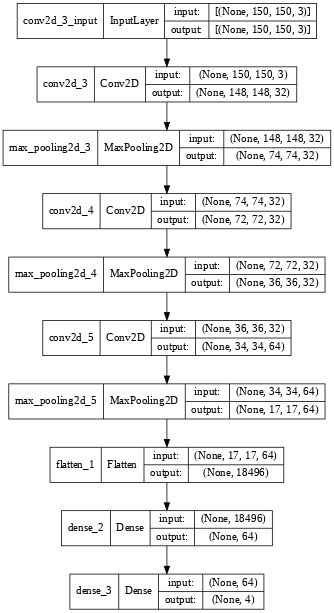

In [37]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

# Proses Training Model
Training ini dilakukan dengan beberapa params diantaranya:
*   training_dataset = merupakan data generator yang sudah kita proses  data training.
*   Steps per epoch merupakan banyaknya steps / langkah untuk menyelesaikan 1 epoch, disini 1 steps merupakan 1 batch_size / 1 batch_size adalah 16 citra, seperti yang sudah di definisikan diatas.
*   epoch = banyaknya proses iterasi/ pengulangan pada training
*   val_data = validation data yang dievaluasi pada setiap epoch berakhir.

In [ ]:
history = model.fit(training_dataset,
          steps_per_epoch=10,
          epochs=120,
          validation_data = validation_dataset)

Epoch 1/120
10/10 [==============================] - 25s 3s/step - loss: 1.4354 - accuracy: 0.3375 - val_loss: 1.2737 - val_accuracy: 0.4343
Epoch 2/120
10/10 [==============================] - 22s 2s/step - loss: 1.2412 - accuracy: 0.4500 - val_loss: 1.1378 - val_accuracy: 0.4550
Epoch 3/120
10/10 [==============================] - 22s 2s/step - loss: 1.1311 - accuracy: 0.4375 - val_loss: 1.0453 - val_accuracy: 0.4948
Epoch 4/120
10/10 [==============================] - 22s 2s/step - loss: 0.9734 - accuracy: 0.5125 - val_loss: 0.8789 - val_accuracy: 0.5000
Epoch 5/120
10/10 [==============================] - 22s 2s/step - loss: 0.7460 - accuracy: 0.6500 - val_loss: 0.8478 - val_accuracy: 0.6583
Epoch 6/120
10/10 [==============================] - 22s 2s/step - loss: 0.7732 - accuracy: 0.7188 - val_loss: 1.1094 - val_accuracy: 0.6687
Epoch 7/120
10/10 [==============================] - 22s 2s/step - loss: 0.7946 - accuracy: 0.7000 - val_loss: 0.6751 - val_accuracy: 0.7258
Epoch 8/120
1

# Plot training
pada plot ini dimunculkan berdasarkan accuracy dan loss

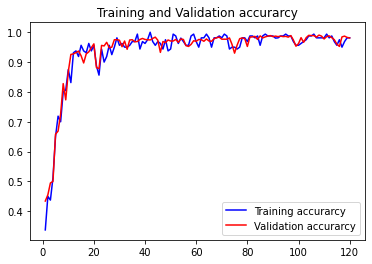

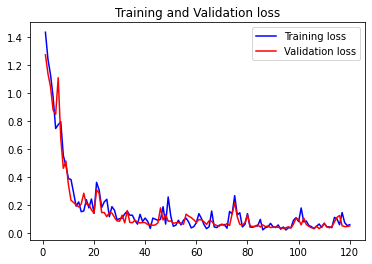

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Simpan Model

In [ ]:
filepath="/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/saved_models/model_save.hdf5"
model.save(filepath)

#save weightnya 
model.save_weights('/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/saved_models/weights.h5')

# Load Model

In [38]:
my_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/saved_models/model_save.hdf5", compile = True)

# Evaluate Model

In [39]:
# mmenghitung jumlah epoch 
test_steps_per_epoch = np.math.ceil(testing_dataset.samples / testing_dataset.batch_size)
test_steps_per_epoch

73

In [40]:
# membuat prediksi dari data testing
pred = my_model.predict_generator(testing_dataset, steps=test_steps_per_epoch)
pred = np.argmax(pred,axis=1)
pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


array([0, 0, 0, ..., 3, 3, 3])

In [41]:
# menyimpan data label yang benar
true_labels = testing_dataset.classes
true_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [42]:
# metric evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
# membuat confusion matrix berdasarkan data prediksi dan label yang benar
cm = confusion_matrix(true_labels, pred)
cm

array([[488,   0,   0,  15],
       [  0, 208,   0,   0],
       [  0,   0, 231,   0],
       [  6,   0,   0, 212]])

Text(0.5, 1.0, 'Confusion Matrix Plot')

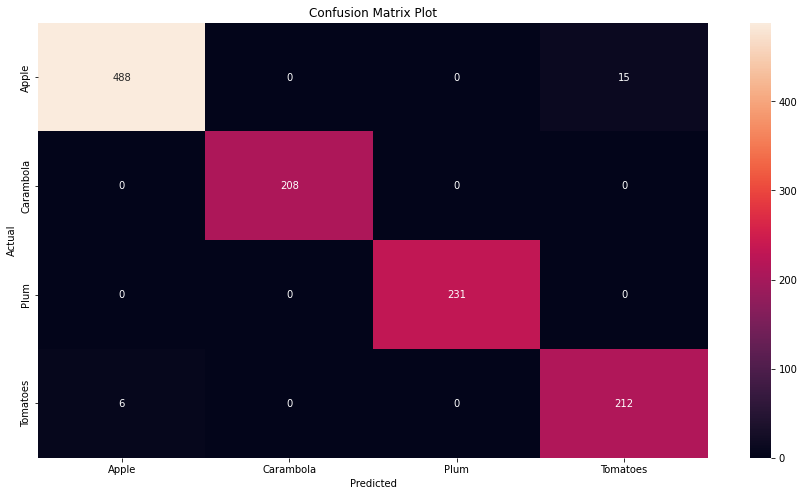

In [44]:
labels = ['Apple', 'Carambola','Plum', 'Tomatoes']
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")

In [45]:
# Get the accuracy on the test set
acc = accuracy_score(true_labels,pred)
print(f'# Accuracy on the test set: {acc * 100:.2f}%')

# Accuracy on the test set: 98.19%


In [50]:
print("[INFO] Calculating model accuracy")
scores = my_model.evaluate(validation_dataset)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
73/73 [==============================] - 23s 304ms/step - loss: 0.0575 - accuracy: 0.9775
Test Accuracy: 97.75086641311646


In [47]:
fruits_acc = np.arange(5).astype('float64')

for i in range(4) :
    fruits_acc[i] = cm[i,i] / sum(cm[i]) * 100
    fruits_acc[i] = round(fruits_acc[i], 2)

#akurasi keseluruhan
fruits_acc[4] = round(accuracy_score(true_labels, pred) *100)
fruits_acc

array([ 97.02, 100.  , 100.  ,  97.25,  98.  ])

In [48]:
df_accuracy = pd.DataFrame({"Label":["Apple","Carambola","Plum","Tomatoes","Total"], "Accuracy":fruits_acc}).set_index("Label")
df_accuracy

,Accuracy
Label,
Apple,97.02
Carambola,100.00
Plum,100.00
Tomatoes,97.25
Total,98.00


In [49]:
print('Classification Report')
print(classification_report(true_labels, pred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

       Apple       0.99      0.97      0.98       503
   Carambola       1.00      1.00      1.00       208
        Plum       1.00      1.00      1.00       231
    Tomatoes       0.93      0.97      0.95       218

    accuracy                           0.98      1160
   macro avg       0.98      0.99      0.98      1160
weighted avg       0.98      0.98      0.98      1160



# Prediksi
Prediksi ini dibagi menjadi 3 yaitu 
1.   Upload file
2.   Membaca ke gambar secara langsung
3.   Membaca file 1 folder



In [55]:
from PIL import Image, ImageOps

In [51]:
#Memasukkan Jenis jenis data ke dalam variable li 
li = ['Apple', 'Carambola', 'Plum', 'Tomatoes']

Saving Apple 02.png to Apple 02.png
Saving Apple 3.png to Apple 3.png
Saving Apple 4.png to Apple 4.png
Saving Apple 5.png to Apple 5.png
Saving Carambola 0033.png to Carambola 0033 (1).png
Saving Carambola 0034.png to Carambola 0034.png
Saving Carambola 0035.png to Carambola 0035 (2).png
Saving Carambola 0036.png to Carambola 0036.png
Saving Plum。1.png to Plum。1.png
Saving Plum。2.png to Plum。2.png
Saving Plum。3.png to Plum。3.png
Saving Plum。4.png to Plum。4.png
Saving Tamotoes0021.png to Tamotoes0021.png
Saving Tamotoes0022.png to Tamotoes0022.png
Saving Tamotoes0023.png to Tamotoes0023.png
Saving Tamotoes0024.png to Tamotoes0024.png


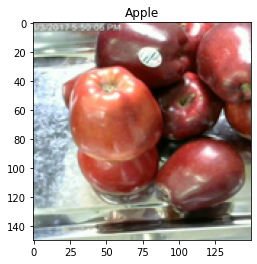

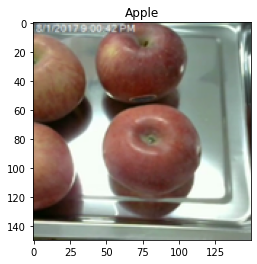

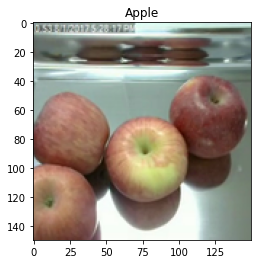

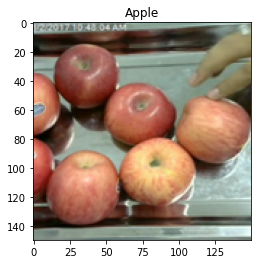

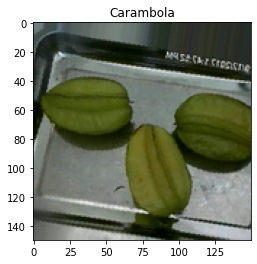

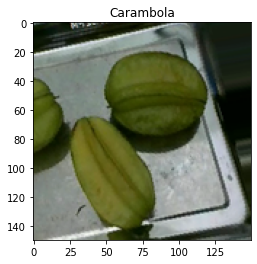

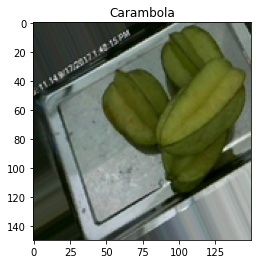

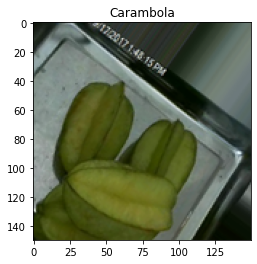

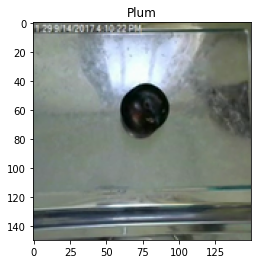

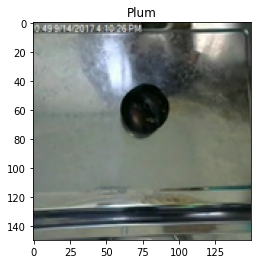

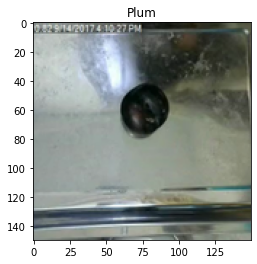

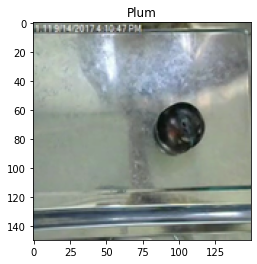

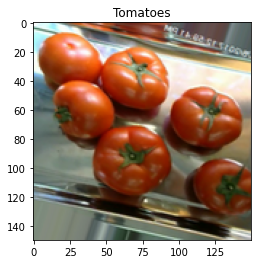

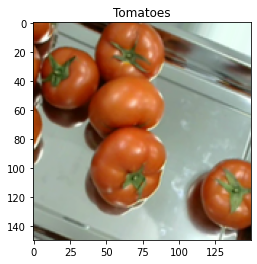

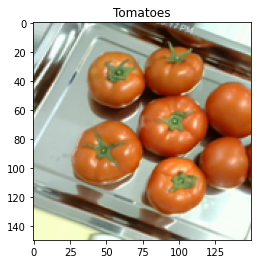

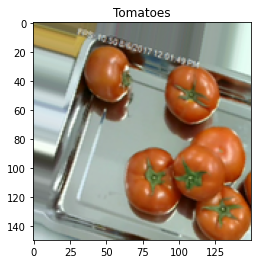

In [ ]:
# predicting by upload file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  image_path = fn
  size= (150,150)
  image = Image.open(image_path)
  new_image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image = np.asarray(image)
  image = np.expand_dims(image,axis=0)
  image = image/255
  prediction = my_model.predict(image)
  prediction = np.argmax(prediction)
  className = li[prediction]

  #ploting image with predicted class name        
  plt.figure(figsize = (4,4))
  plt.imshow(new_image)
  #plt.axis('off')
  plt.title(className)
  plt.show()  

Hasil Prediksi :


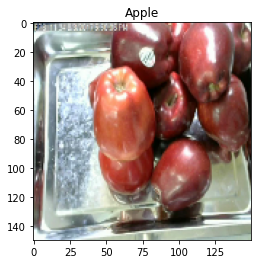

In [53]:
# predicting an image

image_path = '/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data/val/Apples/Apple 02.png'

new_img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Hasil Prediksi :")
prediction = my_model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
#plt.axis('off')
plt.title(class_name)
plt.show()  


In [ ]:
#prediksi dalam beberapa gambar di apple
image_path = '/content/drive/MyDrive/Colab Notebooks/ML_Project/fruits10/processed_data/val/Carambola'

for i in os.listdir(image_path):
  prediction = my_model.predict(img)
  new_img = image.load_img(image_path+'//'+i, target_size=(150, 150))
  img = image.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  d = prediction.flatten()
  j = d.max()
  for index,item in enumerate(d):
      if item == j:
          class_name = li[index]

  plt.figure(figsize = (4,4))
  plt.imshow(new_img)
  #plt.axis('off')
  plt.title(class_name)
  plt.show()  

  